In [2]:
import numpy as np
import pylab as plt
import cv2

import torch
import torch.nn.functional as F

from tqdm import tqdm

In [3]:
class Net(torch.nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.c1 = torch.nn.Conv2d(1, 64, (3,3), padding=1, bias=False)
        self.c2 = torch.nn.Conv2d(64, 64, (3,3), padding=1, bias=False)
        self.c3 = torch.nn.Conv2d(64, 64, (3,3), padding=1, bias=False)
        self.c4 = torch.nn.Conv2d(64, 1, (3,3), padding=1, bias=False)
        
    def forward(self, x):
        x = F.relu(self.c1(x))
        x = F.relu(self.c2(x))
        x = F.relu(self.c3(x))
        x = F.sigmoid(self.c4(x))
        return x

In [4]:
model = Net()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=5e-1, momentum=0.0)

In [5]:
dataX, dataY = np.load('LV10slices.npy')
dataX = dataX[:,:,:,5].swapaxes(0,2)
dataY = dataY[:,:,:,5].swapaxes(0,2)
dataX = cv2.resize(dataX, (32,32))
dataY = cv2.resize(dataY, (32,32))

In [6]:
dataX = torch.autograd.Variable(torch.tensor(dataX[:,:,0].reshape(1,1,32,32)))
dataY = torch.autograd.Variable(torch.tensor(dataY[:,:,0].reshape(1,1,32,32)))

In [7]:
%%time
losses = np.zeros(15)
for i in tqdm(range(15)):
    optimizer.zero_grad()
    outputs = model(dataX.float())
    loss = criterion(outputs, dataY.float())
    loss.backward()
    optimizer.step()
    with torch.no_grad():
        outputs = model(dataX.float())
        loss = criterion(outputs, dataY.float())
        losses[i] += loss.item()

  0%|          | 0/15 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 15/15 [00:01<00:00, 13.32it/s]

CPU times: user 1.14 s, sys: 40.8 ms, total: 1.18 s
Wall time: 1.14 s


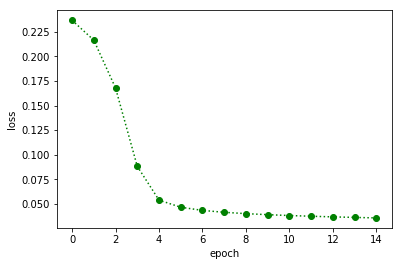

In [8]:
plt.plot(losses, 'go:')
plt.xlabel('epoch'); plt.ylabel('loss')
plt.show()

In [9]:
yp = model(dataX.float())

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


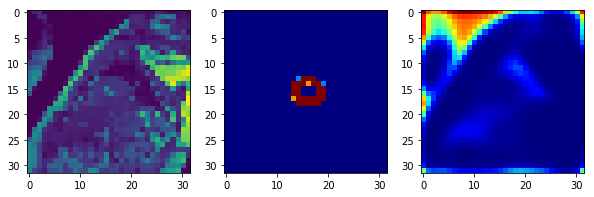

In [10]:
from matplotlib import cm
N = 0
fig, ax = plt.subplots(figsize=(10,3), ncols=3)
ax[0].imshow(dataX.detach().numpy()[0,0])
ax[1].imshow(dataY.detach().numpy()[0,0], cmap=cm.jet)
ax[2].imshow(yp.detach().numpy()[0,0], cmap=cm.jet)
plt.show()